In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
import pandas as pd
import plotly.express as px
from scipy.special import erfc
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from numpy.linalg import norm
from math import *
from scipy.special import log_ndtr
erfc=np.vectorize(erfc)

In [ ]:
#Green functions

In [ ]:
## Contact interactions

In [28]:
def erfc_expx2(x):
    return erfc(x)*np.exp(x**2)

In [100]:
def F(r,rp,a,beta):
    arg=np.sqrt(1/beta)*(r+rp)*0.5 - np.sqrt(beta)/a
    return 1 + 1/a*np.sqrt(pi*beta)*erfc_expx2(arg)
    

def g(x,xprime,beta,a):
    r=norm(x)
    rp=norm(xprime)
    return 1 + 2*beta/(r*rp)*np.exp(-(r*rp + np.dot(x,xprime)/(2*beta) ) )* F(r,rp,a,beta)

<IPython.core.display.Javascript object>


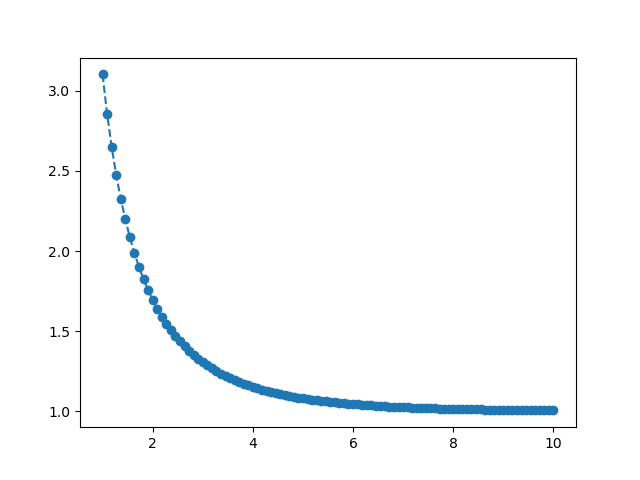

[3.1031950648872106,
 2.85671819134833,
 2.650586196583965,
 2.4760710356902385,
 2.3267749159833437,
 2.197902010336584,
 2.0857872134222966,
 1.9875819801342187,
 1.9010393740981077,
 1.824363602944756,
 1.756102544900065,
 1.695069587732311,
 1.6402858589656153,
 1.5909368999427969,
 1.5463397394770313,
 1.505917567206712,
 1.4691800363540002,
 1.4357077885231095,
 1.405140181407416,
 1.3771654720388788,
 1.351512901079278,
 1.3279462622759781,
 1.3062586420223732,
 1.2862680880940804,
 1.2678140217009737,
 1.2507542482971739,
 1.2349624538468893,
 1.2203260970972551,
 1.2067446267580773,
 1.1941279667087754,
 1.1823952234516981,
 1.1714735787515986,
 1.1612973372964455,
 1.151807104699737,
 1.1429490755524925,
 1.1346744147625902,
 1.1269387182727437,
 1.119701541566998,
 1.1129259862683227,
 1.1065783366819149,
 1.1006277394169237,
 1.0950459202762424,
 1.0898069334814013,
 1.0848869390307931,
 1.0802640046009668,
 1.0759179289139573,
 1.0718300839258013,
 1.0679832735564998,
 1.0

In [102]:
%matplotlib notebook
beta=1/(2*pi)
a=-1000
rs=np.linspace(1,10,num=100)
xs=[ np.array([0,0,0.1])]
ys=[ np.array([0,0,r]) for r in  rs ]
gs = [ g(x,y,beta,a) for x in xs for y in ys  ]
plt.plot(rs,gs,"o--")
gs

In [103]:
(100/30)**(1./3)

1.4938015821857216

<IPython.core.display.Javascript object>


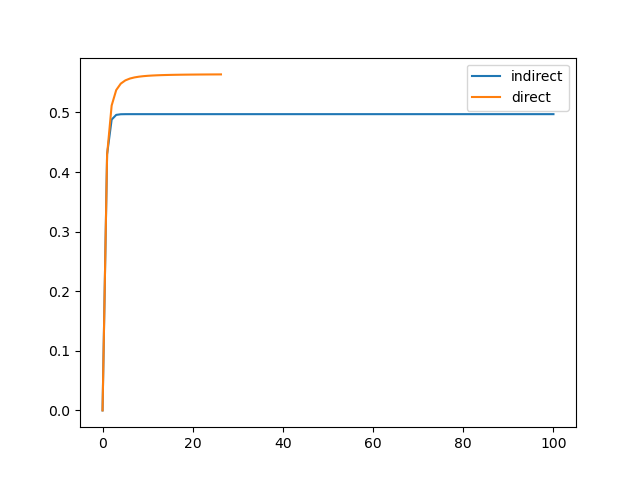

<ipython-input-97-b6cb3994f63c>:20: RuntimeWarning: overflow encountered in exp
  plt.plot(x,erfc(x)*np.exp(x**2)*x,label="direct")
<ipython-input-97-b6cb3994f63c>:20: RuntimeWarning: invalid value encountered in multiply
  plt.plot(x,erfc(x)*np.exp(x**2)*x,label="direct")


In [97]:
%matplotlib notebook
x=np.linspace(0,100,num=100)
def erfc_log(x):
    return np.log(2*(1-np.exp(log_ndtr(x*np.sqrt(2)))))
    
#plt.plot(x,erfc(x) ,label="erfc")

def erfc_expx2(x):
        A=1.98
        B=1.135
        if x==0:
            return 1.
        if (x>0):
            return (1-np.exp(-A*x))/(B*np.sqrt(pi)*x)
        else:
            return 2*np.exp(x**2) - erfc_expx2(-x)
    
#plt.plot(x,erfc(x)*np.exp(x**2),label="direct")
plt.plot(x,np.vectorize(erfc_expx2)(x)*x,label="indirect")
plt.plot(x,erfc(x)*np.exp(x**2)*x,label="direct")
#plt.plot(x,2-erfc(-x),label="indirect")
plt.legend()